<a href="https://colab.research.google.com/github/renatafrustockl/Bootcamp-IGTI---analista-de-Machine-Learning/blob/main/Trabalho_Pratico_4_ML_Renata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print (tf.__version__)

In [6]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top','Trouser','Pulover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

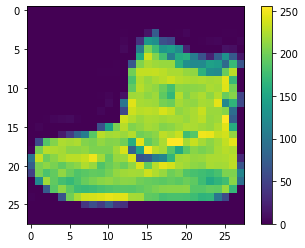

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

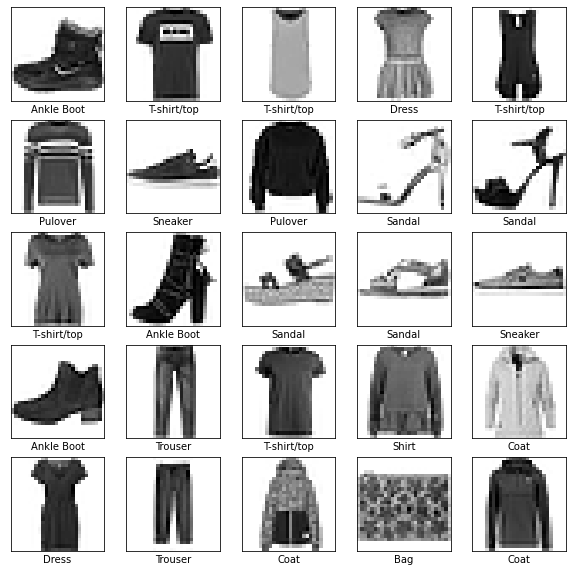

In [17]:
plt.figure(figsize = (10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i],cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[i]])
plt.show() 

In [19]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [21]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6300 - accuracy: 0.7826
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3851 - accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3430 - accuracy: 0.8729
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2632 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2440 - accuracy: 0.9096
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [22]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3388 - accuracy: 0.8834


In [23]:
print('\nTest accuracy: ',test_acc)


Test accuracy:  0.883400022983551


In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([3.3649333e-06, 4.3954836e-07, 5.0688050e-07, 4.2412140e-08,
       7.2841010e-07, 6.1350861e-03, 6.0371826e-07, 4.9917184e-02,
       2.1931095e-05, 9.4392014e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [31]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)     

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                           100*np.max(predictions_array),
                           class_names[true_label]),
                           color = color)

In [29]:
def plot_value_array(i,predictions_array,true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

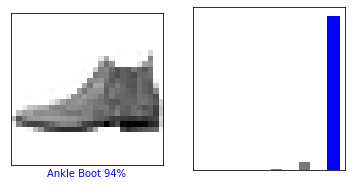

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

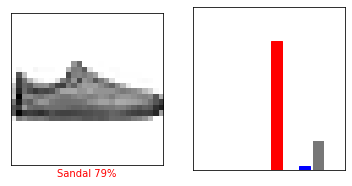

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

#plota o primeiro X test_images, e as labels preditas e as labels verdadeiras.
#Colore as predições corretas de azul e as incorretas de vermelho

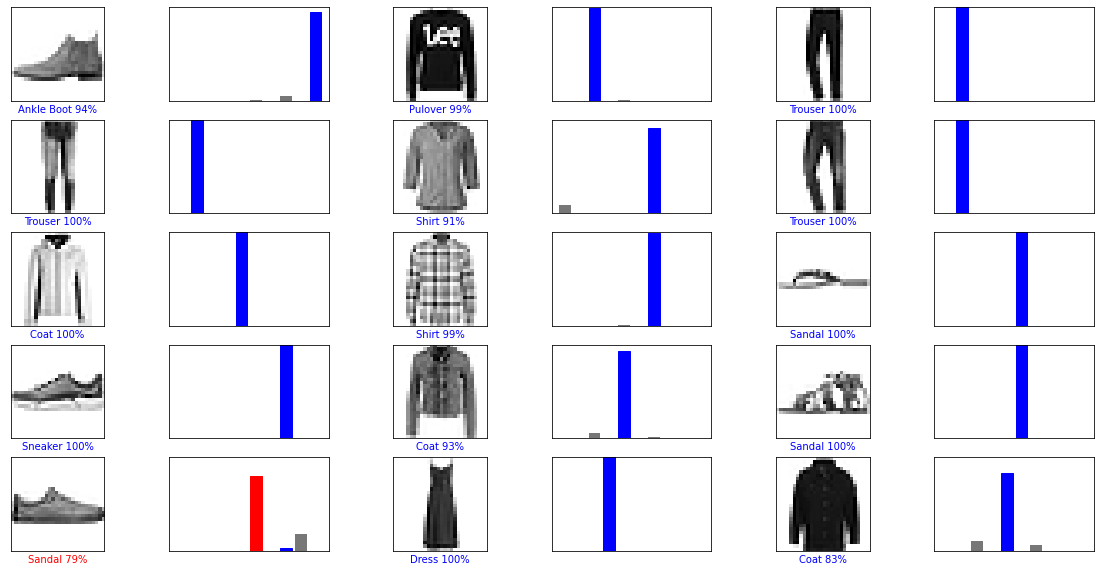

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_rows,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.show()

Modelo treinado para fazer a predição de uma única imagem

In [35]:
#Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


Adiciona a imagem em um batch que possui um só membro

In [37]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Predição da label correta para esta imagem

In [39]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.3649333e-06 4.3954918e-07 5.0688101e-07 4.2412221e-08 7.2840800e-07
  6.1350926e-03 6.0371889e-07 4.9917169e-02 2.1931073e-05 9.4392014e-01]]


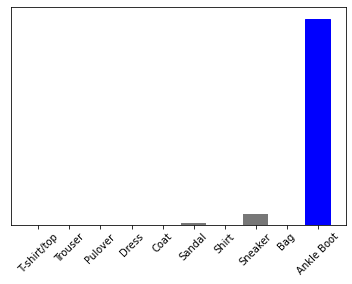

In [40]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

Pegar a predição da única imagem no batch

In [41]:
np.argmax(predictions_single[0])

9